
# Coding and Machine Learning (The Basics)


## Philosophy of this workshop

- This is a **high-level** introduction to Computer Vision. We adhere to the **'learn by playing'** philosophy. We show you how to get things done **quickly**, with only minimal  understanding of what is happening.  However, we hope that this will be the beginning of a **longer learning adventure**.
- These notebooks contain a few **fundamental building blocks** to help you build a reasonably efficient computer vision pipeline. We pillaged the **fastai** library and course materials. If this workshop was useful, and you want to learn more, we highly recommend the ['Deep Learning for Coders'](https://course.fast.ai/) course. 
- Mixed background of the audience. Don't try to **understand everything** (also because we can not explain everything). We begin with a huge black box, parts of it we'll unpack later in the workshop (other parts we'll leave happily in the dark). 

We'd provide you the **tools to experiment**, to assess if computer vision is useful for you... or not.

## Colab Notebooks


Before we start, a quick introduction to the environment: **Colab notebooks**.

Notebooks are combinations of `Text` and `Code` cells.

`Text` adhere to the Markdown syntax.

### Markdown...

[allows](https://www.create.humanities.uva.nl/) **you to** do `all` _kind_ of ``FUN`` stuff!
Hello!

To understand what happens in the previous cell, just double-click, and the [Markdown syntax](https://www.markdownguide.org/basic-syntax/) will expose itself.

In [1]:
print("Print")

Print


Notebooks also accept **bash** code. Just put an exclamation mark before the bash command (in this case `ls` or **list**).

In [2]:
!ls 

sample_data


### Python Code

The `Code` cells run Python code. Copy-paste the print statement in the cell below the cell below. 

**Run** the code by pressing **Shift + Enter**

This should print the same text below the cell below the below cell.

print('Hello world')

In [3]:
print('Hello world')

Hello world


If this works, you are read to go!

### GPUs for Free!

Colab gives "free" access (at least we don't bother figuring out what the price is) to Graphics Processing Units (GPUs). Please make use of these goodies, it speeds up the calculations later on.

Go to `Runtime` select `Change runtime type`. Under `Hardware accelerator` choose GPU and click `Save`.

#### A very gentle intro to Python

So what is Python? 

Python is a **high-level** programming language--meaning that it **hides a lot of complexity** that comes with compiling and running code.

Even though we promised that no coding skills were required, we have to cover the bare minimum to create a common ground.

### Variables

One of the most basic Python statements is to declare a variable (with the `=` symbol). Variables are similar to boxes, which we use to store information. Below we store the number `8` in a variable with the name `x`.

In [4]:
x = 8
print(x)

8


### Data Types

Python makes a basic distinction between numbers and text.

- Number are just integers (e.g. 42) or floats (0.42 or 42.0)

- Strings represent text. Strings are always enclosed with single or double quotations marks.

In [5]:
x = 42 # x is a number
y = "42" # y is a string

Besides these, Python provides other in-built data types (such as dictionaries and lists) which we'll encounter later in some form or another.

### Functions

Besides creating and saving information, Python allows you to **do** stuff with these objects. 

This is where **functions** (or methods) enter the stage. These goodies are usually marked by parentheses `()`.

Functions mostly perform some operations and return the result of their work. For example a function that prints your name plus `hello`.

In [3]:
def hello_name(name):
    print("Hello", name)

In [4]:
name = "Daniel"
hello_name(name)

Hello Daniel


### Accessing auto completion

In [7]:
name.lower()

'daniel'

Another function is `max()`, which returns the highest value in a `list` of numbers. A list is defined by `[` and `]` in Python.

In [8]:
my_grades = [5,6,9,10]
max(my_grades)

10

Note that this does the same as

In [9]:
my_grades = [5,6,9,10]
highest_grade = max(my_grades)
print(highest_grade)

10


Let's now turn to Computer Vision

# Machine Learning and Computer Vision

- Computer vision is the broad field of using computers for **visual tasks**
- Early examples of computer vision include automatic detection of **hand-written postcodes**
- In this workshop we focus on one specific task: **supervised classification**. We use computer vision to label images (e.g. what objects are in the picture?)

![MNIST example](https://media.giphy.com/media/brWyrk1vFAt7a/giphy.gif)




## What is an image

![Images pixels as a matrix of numbers](https://github.com/Living-with-machines/computer-vision-DHNordic-2020-workshop/blob/master/figs/pixels_matrix.png?raw=1) 
*Source: Melvin Wevers, Thomas Smits, The visual digital turn: Using neural networks to study historical images, Digital Scholarship in the Humanities, https://doi.org/10.1093/llc/fqy085*

An image is represented by a **tensor of pixel intensities**. In the case of a greyscale image, this is a **matrix** with each cell within the range of zero (black) to 255 (white). Colour images are **tensors of rank 3 **(effectively a matrix for each RGB channel)

If you don't believe me, try it out! Change the values in the matrix below and inspect the result. 

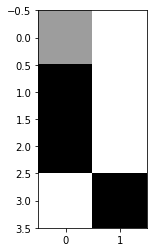

In [10]:
%matplotlib inline 
# tell Colab to print images in the notebook
from matplotlib import pyplot as plt # import library
import numpy as np # import library

data = [[134,254], # create a variable with the name data that contains 4 x 2 matrix
         [1,254],
         [1,254],
         [254,1]]
plt.imshow(data,cmap='Greys_r') # show the image

In [11]:
# enter code here


## Supervised Learning

**Supervised learning** is one branch of the machine learning. 

In this setting we feed the algorithm a number of **labeled examples**, so that it can learn a relation between the **content** and the **label** of a document.

You can think of a very simple **rule-based** algorithm: `if ... else` that uses one **threshold value** $y$ to distinguish two classes of images from each other ('Cow', 'Not a cow')

```python
if x > y:
  print('Cow')
else:
  print('Not a cow')
```

- In this scenario `x` represents (a transformation) of the **input**, for example the average pixel intensity of an image. 
- `y` is a **parameter** we need to **learn**. 
- Learning the best value of `y` happens during **training**. 
- The value that results in the best **fit** (yields as few as possible classification errors (also called **loss**)) is selected. This stage is called **fitting the parameters of the model** (we select the best value $y$ given our training data).

After feeding the simple rule-based classifier some examples, it will learn the best value of $y$ to distinguish between 'Cow' and 'Not Cow' pictures. Imagine it decides 123.4 is the best value of `y`. 

The result of training is a **model** that can also **predict** the label of new (yet unseen) image. 

The model than looks like:


 
```python
if img > 123.4:
  print('Moooooh')
else:
  print('Maaaaaah')
```

## Is this a good approach?

Reality is unfortunately more complex. Training deep learning models usually involves setting **millions of parameters** (instead of just one simple threshold value as in the example above). We discuss the deep learning workflow in more detail in the next Notebook.

## A classification challenge 

We'll introduce computer vision and machine learning using a practical example. 

https://blog.archive.org/2019/01/05/helping-us-judge-a-book-by-its-cover-software-help-request/

### What we need to do?
- Decide whether a book cover is useful or not
- With this information they decide how they will display items on the website. 

### How could we tackle this problem?
- Staff time i.e. get people to manually decide 
- Crowdsourcing 
- Automatic methods 

## Rule based approach

psuedo code 
```python
if cover > 8 solid:
    cover = not_useful
elif cover < 8 solid:
    try ocr(cover)
    if > 4 chars detected:
        cover = useful 
```

## Is this a good approach?

- If we want to evaluate whether this is a sensible approach we should have a look at some of the covers to evaluate 

### Take a look at some examples...

https://ia800708.us.archive.org/view_archive.php?archive=/4/items/year-1923-not-very-useful-covers/year-1923-not-very-useful-covers.zip&file=year-1923-not-very-useful-covers%2F10sermonspreache00donnuoft.jpg

### Understanding your data 

- Whichever approach you use it is important to be familiar with your data. You want to know if there are outliers or particular things to watch out for. 


## Downloading data 

The cells below download a zip file from GitHub unzip the archive and move it into a new folder. 


In [12]:
!wget -O bookdata.zip 'https://github.com/davanstrien/computer-vision-DHNoridic-2020-workshop/blob/master/bookdata.zip?raw=true'
!unzip 'bookdata.zip'

--2022-03-20 15:55:40--  https://github.com/davanstrien/computer-vision-DHNoridic-2020-workshop/blob/master/bookdata.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/davanstrien/computer-vision-DHNordic-2020-workshop/blob/master/bookdata.zip?raw=true [following]
--2022-03-20 15:55:40--  https://github.com/davanstrien/computer-vision-DHNordic-2020-workshop/blob/master/bookdata.zip?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/davanstrien/computer-vision-DHNordic-2020-workshop/raw/master/bookdata.zip [following]
--2022-03-20 15:55:40--  https://github.com/davanstrien/computer-vision-DHNordic-2020-workshop/raw/master/bookdata.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found


## Creating an image classifier 

Now we we have defined the goal we want to try to tackle with deep learning, we'll move to developing the code for this task. There are a number of ways we could do this. The Python programming language provides all the functionality we would need to develop code to tackle this problem from scratch, however we'll almost always want to tackle a computer vision problems by building on top of an existing framework or software library. These libraries will allow you to tackle your problem with much less code compared to creating a solution from scratch and will also be much more efficient and likely to contain less bugs. 

Some libraries/frameworks for deep learning with Python interfaces include include; [Keras](https://keras.io/), [Tensorflow](https://www.tensorflow.org/), [Pytorch](https://pytorch.org/), and [fastai](fast.ai). These libraries have slight different features and aims but all of them implement some of the common building blocks of deep learning. There are advantages and disadvantages to all of these frameworks with some being more suited for particular tasks. 

#### What is fastai?

In this workshop we will work with [fastai](http://docs.fast.ai/). fastai is a Python library for deep learning ["which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches"](https://arxiv.org/abs/2002.04688). The library is developed by [fast.ai](https://www.fast.ai/about/) (notice the dot!). fast.ai is a research organisation that aims to make deep learning more accessible. Alongside the fastai library, fast.ai also organises free courses and carries out research. 

There are a few reasons why fastai was chosen for this tutorial: 

- it is focused on making deep learning accessible, both in the API to the library but also in implementing techniques that limit the requirements for a large amount of data or computational resources 
- many best practices are implemented as 'defaults', helping achieve good results
- there are different levels at which you can interact with the library depending on how much you need to change lower-level details
- the library sits on top of Pytorch which makes it relatively simple to use existing Pytorch code. 

Although this tutorial focuses on fastai, many of the techniques shown are applicable across other frameworks too. 

## Loading the data 

In [13]:
!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 8.3 MB/s 
     |████████████████████████████████| 55 kB 5.3 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [14]:
from fastai.vision.all import *

In [15]:
dls = ImageDataLoaders.from_folder('book-data/', valid_pct=0.2, item_tfms=Resize(224, ResizeMethod.Squish), num_workers=0)

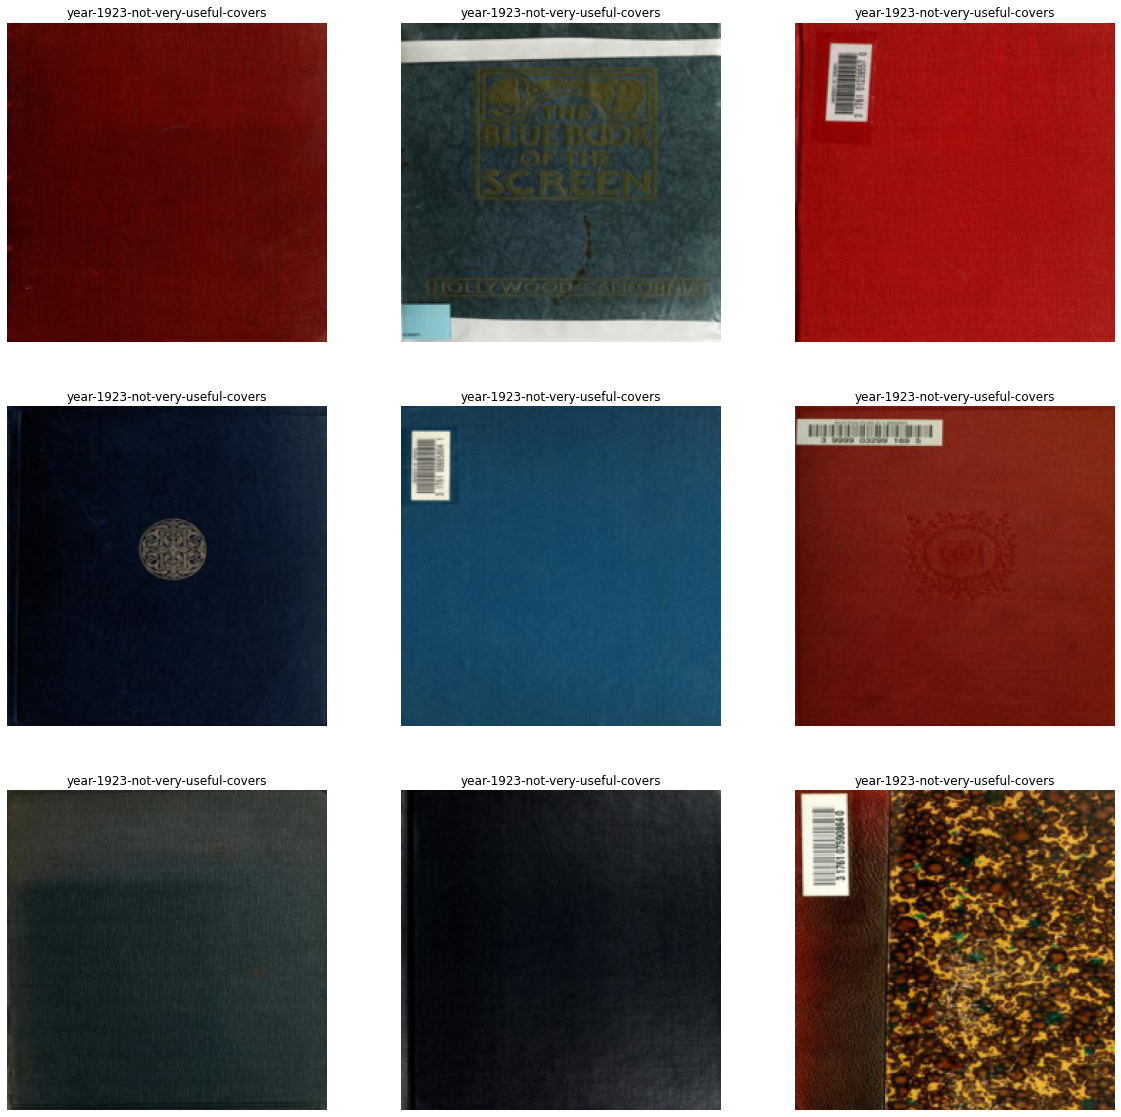

In [16]:
dls.show_batch(figsize=(20,20))

In [17]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [18]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.036289,0.995792,0.748718,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.616567,0.649957,0.810256,00:06
1,0.467777,0.618444,0.871795,00:05
2,0.342766,0.691404,0.892308,00:05
3,0.258691,0.549335,0.923077,00:05
4,0.198324,0.550810,0.928205,00:05
5,0.161115,0.473454,0.912821,00:05
6,0.123189,0.512029,0.907692,00:06
7,0.096409,0.504273,0.912821,00:05
8,0.083218,0.535226,0.912821,00:05
9,0.069195,0.523781,0.912821,00:05


## Predicting on a new image

In [19]:
!wget "https://ia600207.us.archive.org/32/items/aliceimspiegella00carrrich/__ia_thumb.jpg"

--2022-03-20 15:57:18--  https://ia600207.us.archive.org/32/items/aliceimspiegella00carrrich/__ia_thumb.jpg
Resolving ia600207.us.archive.org (ia600207.us.archive.org)... 207.241.227.227
Connecting to ia600207.us.archive.org (ia600207.us.archive.org)|207.241.227.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7229 (7.1K) [image/jpeg]
Saving to: ‘__ia_thumb.jpg’

__ia_thumb.jpg      100%[===================>]   7.06K  --.-KB/s    in 0s      

2022-03-20 15:57:18 (1.30 GB/s) - ‘__ia_thumb.jpg’ saved [7229/7229]



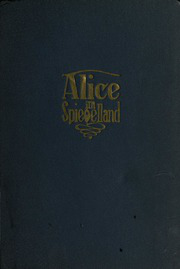

In [20]:
img = PILImage.create('__ia_thumb.jpg')
img

In [21]:
learn.predict(img)

('year-1923-not-very-useful-covers',
 TensorBase(0),
 TensorBase([0.9595, 0.0405]))

# Extending this in practice 
- Ask for feedback 
- Get more training examples 
- Define what a useful cover is more tightly 

# Questions so far?

10-15 mins to work through notebooks yourself 